Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

2023-11-18 20:24:23.209375: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 20:24:23.249771: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 20:24:23.249847: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 20:24:23.251421: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-18 20:24:23.258358: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 20:24:23.259338: I tensorflow/core/platform/cpu_feature_guard.cc:1

Load Dataset

In [2]:
# Import txt file
df2 = pd.read_csv('A1-synthetic.txt', sep="\t", decimal=".")

# Rename the column '#v1' to 'v1'
df2.rename(columns={'#v1': 'v1'}, inplace=True)

# Separate features (x2) and target variable (y2)
x2, y2 = df2.drop(["z"], axis=1), df2[["z"]]

Train-Test Split

In [3]:
# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

Scale Features and Target Variable

In [4]:
scaler = MinMaxScaler()
x2_train_scaled = scaler.fit_transform(x2_train)
x2_test_scaled = scaler.transform(x2_test)
y2_train_scaled = scaler.fit_transform(y2_train.values.reshape(-1, 1)).flatten()
y2_test_scaled = scaler.transform(y2_test.values.reshape(-1, 1)).flatten()


Create and Train Neural Network Model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x2_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Linear activation for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')  # Use mean squared error for regression

# Train the model
history = model.fit(x2_train_scaled, y2_train_scaled, epochs=100, validation_split=0.2, verbose=0)


Make Predictions

In [6]:
nn_predictions_scaled = model.predict(x2_test_scaled).flatten()

# Reverse scaling for evaluation metrics
nn_predictions = scaler.inverse_transform(nn_predictions_scaled.reshape(-1, 1)).flatten()


7/7 [==============================] - 0s 4ms/step


Evaluate Model Performance

In [7]:
mape_nn = mean_absolute_percentage_error(y2_test, nn_predictions)
print(f"MAPE for Neural Network: {mape_nn}")

mae_nn = mean_absolute_error(y2_test, nn_predictions)
print(f"MAE for Neural Network: {mae_nn}")


MAPE for Neural Network: 0.16934701291325338
MAE for Neural Network: 0.6069904249164619


Scatter Plot

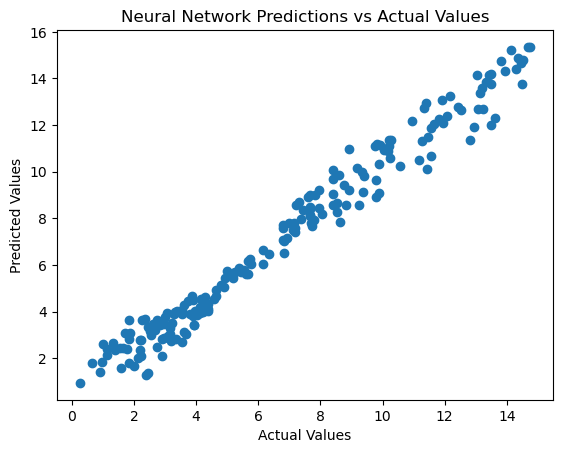

In [8]:
plt.scatter(y2_test, nn_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Neural Network Predictions vs Actual Values")
plt.show()
